In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, Embedding, Masking
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.utils import to_categorical

In [317]:
from model_helper import *

In [5]:
cwd = os.getcwd()
parent_wd = cwd.replace('/model', '')
training_set_path = parent_wd + '/preprocessing/training_set'
dev_set_path = parent_wd + '/preprocessing/dev_set'

In [7]:
with open(training_set_path, 'rb') as f:
    training_set = pickle.load(f)
with open(dev_set_path, 'rb') as f:
    dev_set = pickle.load(f)

In [21]:
X_train = training_set['X']
Y_train = training_set['Y']
X_dev = dev_set['X']
Y_dev = dev_set['Y']

In [51]:
training_normalized_set_path = parent_wd + '/preprocessing/training_set_n'
dev_normalized_set_path = parent_wd + '/preprocessing/dev_set_n'

In [52]:
with open(training_normalized_set_path, 'rb') as f:
    training_set_n = pickle.load(f)
with open(dev_normalized_set_path, 'rb') as f:
    dev_set_n = pickle.load(f)

In [53]:
X_train_n = training_set_n['X']
Y_train_n = training_set_n['Y']
X_dev_n = dev_set_n['X']
Y_dev_n = dev_set_n['Y']

### block for error analysis

In [251]:
dev_set_n['keys']

array(['140986', '201389', '331181', ..., '307468', '312064', '325342'],
      dtype='<U6')

### model 1: LSTM, Relu, adam

In [29]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(30, 10)))
model1.add(Dense(16, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                816       
Total params: 13,016
Trainable params: 13,016
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
history1_all = []

In [31]:
history1= model1.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history1_all.append(history1)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 5s 188us/step - loss: 2.0903 - accuracy: 0.3211 - val_loss: 1.7760 - val_accuracy: 0.3377
Epoch 2/10
24634/24634 [==============================] - 4s 178us/step - loss: 1.7138 - accuracy: 0.3616 - val_loss: 1.6933 - val_accuracy: 0.3713
Epoch 3/10
24634/24634 [==============================] - 4s 174us/step - loss: 1.6557 - accuracy: 0.3756 - val_loss: 1.6665 - val_accuracy: 0.3740
Epoch 4/10
24634/24634 [==============================] - 4s 177us/step - loss: 1.6128 - accuracy: 0.3840 - val_loss: 1.6043 - val_accuracy: 0.3893
Epoch 5/10
24634/24634 [==============================] - 4s 177us/step - loss: 1.6038 - accuracy: 0.3895 - val_loss: 1.5829 - val_accuracy: 0.3933
Epoch 6/10
24634/24634 [==============================] - 4s 176us/step - loss: 1.5748 - accuracy: 0.3969 - val_loss: 1.5757 - val_accuracy: 0.3940
Epoch 7/10
24634/24634 [==============================] - 4s 18

In [32]:
history1= model1.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history1_all.append(history1)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 4s 181us/step - loss: 1.5375 - accuracy: 0.4052 - val_loss: 1.5429 - val_accuracy: 0.3997
Epoch 2/10
24634/24634 [==============================] - 4s 176us/step - loss: 1.5262 - accuracy: 0.4069 - val_loss: 1.5718 - val_accuracy: 0.3877
Epoch 3/10
24634/24634 [==============================] - 4s 178us/step - loss: 1.5208 - accuracy: 0.4088 - val_loss: 1.5338 - val_accuracy: 0.4060
Epoch 4/10
24634/24634 [==============================] - 4s 180us/step - loss: 1.5129 - accuracy: 0.4085 - val_loss: 1.5343 - val_accuracy: 0.4103
Epoch 5/10
24634/24634 [==============================] - 5s 186us/step - loss: 1.5249 - accuracy: 0.4045 - val_loss: 1.5695 - val_accuracy: 0.4050
Epoch 6/10
24634/24634 [==============================] - 4s 182us/step - loss: 1.5209 - accuracy: 0.4081 - val_loss: 1.5443 - val_accuracy: 0.4067
Epoch 7/10
24634/24634 [==============================] - 4s 17

In [33]:
history1= model1.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history1_all.append(history1)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 4s 179us/step - loss: 1.5122 - accuracy: 0.4112 - val_loss: 1.5094 - val_accuracy: 0.4197
Epoch 2/10
24634/24634 [==============================] - 4s 170us/step - loss: 1.4921 - accuracy: 0.4149 - val_loss: 1.5308 - val_accuracy: 0.4050
Epoch 3/10
24634/24634 [==============================] - 4s 182us/step - loss: 1.5073 - accuracy: 0.4115 - val_loss: 1.5191 - val_accuracy: 0.4090
Epoch 4/10
24634/24634 [==============================] - 4s 178us/step - loss: 1.4935 - accuracy: 0.4137 - val_loss: 1.5499 - val_accuracy: 0.3990
Epoch 5/10
24634/24634 [==============================] - 4s 176us/step - loss: 1.4998 - accuracy: 0.4119 - val_loss: 1.5764 - val_accuracy: 0.4027
Epoch 6/10
24634/24634 [==============================] - 4s 179us/step - loss: 1.4953 - accuracy: 0.4120 - val_loss: 1.5177 - val_accuracy: 0.4090
Epoch 7/10
24634/24634 [==============================] - 4s 18

In [163]:
for i in range(20):
    history1= model1.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
    history1_all.append(history1)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 6s 232us/step - loss: 1.4789 - accuracy: 0.4157 - val_loss: 1.5234 - val_accuracy: 0.4050
Epoch 2/10
24634/24634 [==============================] - 6s 238us/step - loss: 1.4782 - accuracy: 0.4186 - val_loss: 1.5152 - val_accuracy: 0.4177
Epoch 3/10
24634/24634 [==============================] - 7s 265us/step - loss: 1.4796 - accuracy: 0.4168 - val_loss: 1.5421 - val_accuracy: 0.4113
Epoch 4/10
24634/24634 [==============================] - 6s 245us/step - loss: 1.4796 - accuracy: 0.4189 - val_loss: 1.4940 - val_accuracy: 0.4243
Epoch 5/10
24634/24634 [==============================] - 6s 252us/step - loss: 1.4853 - accuracy: 0.4181 - val_loss: 1.5217 - val_accuracy: 0.4097
Epoch 6/10
24634/24634 [==============================] - 6s 243us/step - loss: 1.4847 - accuracy: 0.4186 - val_loss: 1.4998 - val_accuracy: 0.4147
Epoch 7/10
24634/24634 [==============================] - 6s 23

In [366]:
F1_1 = metrics.f1_score(Y_dev, model1.predict_classes(X_dev), average = 'macro')
print(F1_1)

0.15806244363445215


### model 2: LSTM, Relu, adam, increase neuron number to 100

In [34]:
model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model2.add(Dense(16, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1616      
Total params: 46,016
Trainable params: 46,016
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history2_all = []

In [36]:
history2= model2.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history2_all.append(history2)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 8s 318us/step - loss: 1.9014 - accuracy: 0.3375 - val_loss: 1.7173 - val_accuracy: 0.3640
Epoch 2/10
24634/24634 [==============================] - 8s 305us/step - loss: 1.6525 - accuracy: 0.3774 - val_loss: 1.6370 - val_accuracy: 0.3760
Epoch 3/10
24634/24634 [==============================] - 8s 310us/step - loss: 1.6109 - accuracy: 0.3855 - val_loss: 1.5822 - val_accuracy: 0.4017
Epoch 4/10
24634/24634 [==============================] - 8s 320us/step - loss: 1.5749 - accuracy: 0.3964 - val_loss: 1.5808 - val_accuracy: 0.3960
Epoch 5/10
24634/24634 [==============================] - 9s 365us/step - loss: 1.5524 - accuracy: 0.4011 - val_loss: 1.5520 - val_accuracy: 0.4080
Epoch 6/10
24634/24634 [==============================] - 8s 313us/step - loss: 1.5409 - accuracy: 0.4039 - val_loss: 1.5572 - val_accuracy: 0.4077
Epoch 7/10
24634/24634 [==============================] - 8s 31

In [365]:
F1_2 = metrics.f1_score(Y_dev, model2.predict_classes(X_dev), average = 'macro')
print(F1_2)

0.12730741173975357


### model 3: LSTM, Relu, adam, add masking layer

In [46]:
model3 = Sequential()
model3.add(Masking(mask_value=0., input_shape=(30, 10)))
model3.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model3.add(Dense(16, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1616      
Total params: 46,016
Trainable params: 46,016
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
history3_all = []

In [47]:
history3 = model3.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history3_all.append(history3)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 9s 377us/step - loss: 1.9538 - accuracy: 0.3169 - val_loss: 1.7443 - val_accuracy: 0.3540
Epoch 2/10
24634/24634 [==============================] - 10s 388us/step - loss: 1.6918 - accuracy: 0.3673 - val_loss: 1.6766 - val_accuracy: 0.3733
Epoch 3/10
24634/24634 [==============================] - 10s 404us/step - loss: 1.6372 - accuracy: 0.3827 - val_loss: 1.6175 - val_accuracy: 0.3953
Epoch 4/10
24634/24634 [==============================] - 10s 402us/step - loss: 1.5958 - accuracy: 0.3902 - val_loss: 1.5834 - val_accuracy: 0.3883
Epoch 5/10
24634/24634 [==============================] - 9s 383us/step - loss: 1.5690 - accuracy: 0.3968 - val_loss: 1.5670 - val_accuracy: 0.3940
Epoch 6/10
24634/24634 [==============================] - 12s 474us/step - loss: 1.5540 - accuracy: 0.3989 - val_loss: 1.5603 - val_accuracy: 0.3970
Epoch 7/10
24634/24634 [==============================] - 1

In [364]:
F1_3 = metrics.f1_score(Y_dev, model3.predict_classes(X_dev), average = 'macro')
print(F1_3)

0.1624407204012387


### model 4: LSTM, Relu, adam, add masking layer, increase neuron to 1000

In [48]:
model4 = Sequential()
model4.add(Masking(mask_value=0., input_shape=(30, 10)))
model4.add(LSTM(1000, activation='relu', input_shape=(30, 10)))
model4.add(Dense(16, activation='softmax'))
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1000)              4044000   
_________________________________________________________________
dense_7 (Dense)              (None, 16)                16016     
Total params: 4,060,016
Trainable params: 4,060,016
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
history4_all = []

In [50]:
history4 = model4.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
history4_all.append(history4)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 190s 8ms/step - loss: 1.7885 - accuracy: 0.3481 - val_loss: 1.6928 - val_accuracy: 0.3677
Epoch 2/10
24634/24634 [==============================] - 181s 7ms/step - loss: 1.6352 - accuracy: 0.3810 - val_loss: 1.6430 - val_accuracy: 0.3710
Epoch 3/10
24634/24634 [==============================] - 178s 7ms/step - loss: 1.5960 - accuracy: 0.3911 - val_loss: 1.5738 - val_accuracy: 0.3983
Epoch 4/10
24634/24634 [==============================] - 196s 8ms/step - loss: 1.5624 - accuracy: 0.3964 - val_loss: 1.5432 - val_accuracy: 0.4103
Epoch 5/10
24634/24634 [==============================] - 202s 8ms/step - loss: 1.5395 - accuracy: 0.4027 - val_loss: 1.5270 - val_accuracy: 0.4037
Epoch 6/10
24634/24634 [==============================] - 209s 9ms/step - loss: 1.5248 - accuracy: 0.4094 - val_loss: 1.5268 - val_accuracy: 0.4080
Epoch 7/10
24634/24634 [==============================] - 198s 

In [363]:
F1_4 = metrics.f1_score(Y_dev, model5.predict_classes(X_dev), average = 'macro')
print(F1_4)

0.012738278707647769


### model 5: LSTM, Relu, adam, add masking layer, using normalized input

In [54]:
model5 = Sequential()
model5.add(Masking(mask_value=0., input_shape=(30, 10)))
model5.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model5.add(Dense(16, activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model5.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_3 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1616      
Total params: 46,016
Trainable params: 46,016
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
history5_all = []

In [56]:
history5 = model5.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n))
history5_all.append(history5)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 11s 434us/step - loss: 1.9202 - accuracy: 0.3386 - val_loss: 1.7371 - val_accuracy: 0.3617
Epoch 2/10
24634/24634 [==============================] - 13s 515us/step - loss: 1.6864 - accuracy: 0.3731 - val_loss: 1.6865 - val_accuracy: 0.3800
Epoch 3/10
24634/24634 [==============================] - 12s 480us/step - loss: 1.6438 - accuracy: 0.3807 - val_loss: 1.6331 - val_accuracy: 0.3903
Epoch 4/10
24634/24634 [==============================] - 10s 405us/step - loss: 1.6121 - accuracy: 0.3900 - val_loss: 1.6034 - val_accuracy: 0.3913
Epoch 5/10
24634/24634 [==============================] - 10s 394us/step - loss: 1.5800 - accuracy: 0.3960 - val_loss: 1.5816 - val_accuracy: 0.3993
Epoch 6/10
24634/24634 [==============================] - 11s 450us/step - loss: 1.5591 - accuracy: 0.3989 - val_loss: 1.5608 - val_accuracy: 0.4033
Epoch 7/10
24634/24634 [==============================] -

In [57]:
history5 = model5.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n))
history5_all.append(history5)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 11s 432us/step - loss: 1.5082 - accuracy: 0.4152 - val_loss: 1.5093 - val_accuracy: 0.4100
Epoch 2/10
24634/24634 [==============================] - 11s 453us/step - loss: 1.5016 - accuracy: 0.4182 - val_loss: 1.5035 - val_accuracy: 0.4123
Epoch 3/10
24634/24634 [==============================] - 10s 422us/step - loss: 1.4970 - accuracy: 0.4175 - val_loss: 1.4964 - val_accuracy: 0.4177
Epoch 4/10
24634/24634 [==============================] - 10s 415us/step - loss: 1.4945 - accuracy: 0.4211 - val_loss: 1.4958 - val_accuracy: 0.4157
Epoch 5/10
24634/24634 [==============================] - 11s 440us/step - loss: 1.4912 - accuracy: 0.4216 - val_loss: 1.5199 - val_accuracy: 0.4137
Epoch 6/10
24634/24634 [==============================] - 10s 390us/step - loss: 1.4825 - accuracy: 0.4234 - val_loss: 1.4988 - val_accuracy: 0.4157
Epoch 7/10
24634/24634 [==============================] -

In [362]:
F1_5 = metrics.f1_score(Y_dev_n, model5.predict_classes(X_dev_n), average = 'macro')
print(F1_5)

0.1728579028844036


### model 6: LSTM, Relu, adam, add masking layer, using normalized input, weighted input

In [61]:
class_weight = {0: 10150,
                1: 10150,
                2: 1128., 
                3: 1, 
                4: 2.65, 
                5: 2.20, 
                6: 2.51, 
                7: 3.30, 
                8: 6.54, 
                9: 6.26, 
                10: 9.57, 
                11: 26.1, 
                12: 56.1, 
                13: 199, 
                14: 191, 
                15: 10150}

In [68]:
class_weight_log = {0: 10.23,
                1: 10.23,
                2: 8.03, 
                3: 1, 
                4: 1.97, 
                5: 1.79, 
                6: 1.92, 
                7: 2.29, 
                8: 2.88, 
                9: 2.83, 
                10: 3.26, 
                11: 4.26, 
                12: 5.03, 
                13: 6.29, 
                14: 6.25, 
                15: 10.23}

In [62]:
model6 = Sequential()
model6.add(Masking(mask_value=0., input_shape=(30, 10)))
model6.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model6.add(Dense(16, activation='softmax'))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model6.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_5 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1616      
Total params: 46,016
Trainable params: 46,016
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
history6_all = []

In [64]:
history6 = model6.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight)
history6_all.append(history6)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 12s 475us/step - loss: 28.2097 - accuracy: 0.0046 - val_loss: 3.0710 - val_accuracy: 0.0013
Epoch 2/10
24634/24634 [==============================] - 10s 416us/step - loss: 20.2837 - accuracy: 7.7129e-04 - val_loss: 3.3970 - val_accuracy: 0.0013
Epoch 3/10
24634/24634 [==============================] - 10s 395us/step - loss: 18.7282 - accuracy: 7.7129e-04 - val_loss: 3.2223 - val_accuracy: 0.0013
Epoch 4/10
24634/24634 [==============================] - 10s 395us/step - loss: 18.0757 - accuracy: 7.7129e-04 - val_loss: 3.5722 - val_accuracy: 0.0013
Epoch 5/10
24634/24634 [==============================] - 10s 401us/step - loss: 17.6993 - accuracy: 7.7129e-04 - val_loss: 3.3520 - val_accuracy: 0.0013
Epoch 6/10
24634/24634 [==============================] - 10s 405us/step - loss: 17.2966 - accuracy: 7.7129e-04 - val_loss: 3.0918 - val_accuracy: 0.0013
Epoch 7/10
24634/24634 [=======

In [65]:
for i in range(5):
    history6 = model6.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight)
    history6_all.append(history6)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 10s 424us/step - loss: 14.4689 - accuracy: 0.1255 - val_loss: 2.6855 - val_accuracy: 0.1450
Epoch 2/10
24634/24634 [==============================] - 9s 383us/step - loss: 13.9215 - accuracy: 0.1713 - val_loss: 2.6016 - val_accuracy: 0.2000
Epoch 3/10
24634/24634 [==============================] - 10s 398us/step - loss: 12.8512 - accuracy: 0.1552 - val_loss: 2.4450 - val_accuracy: 0.1813
Epoch 4/10
24634/24634 [==============================] - 10s 389us/step - loss: 13.0175 - accuracy: 0.1530 - val_loss: 2.6318 - val_accuracy: 0.0720
Epoch 5/10
24634/24634 [==============================] - 9s 381us/step - loss: 13.5409 - accuracy: 0.1517 - val_loss: 2.7211 - val_accuracy: 0.2007
Epoch 6/10
24634/24634 [==============================] - 10s 386us/step - loss: 12.8318 - accuracy: 0.2369 - val_loss: 2.3968 - val_accuracy: 0.2453
Epoch 7/10
24634/24634 [=============================

In [66]:
for i in range(5):
    history6 = model6.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight)
    history6_all.append(history6)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 9s 383us/step - loss: 7.5998 - accuracy: 0.3078 - val_loss: 1.9273 - val_accuracy: 0.2883
Epoch 2/10
24634/24634 [==============================] - 9s 374us/step - loss: 7.5479 - accuracy: 0.3074 - val_loss: 1.9264 - val_accuracy: 0.2947
Epoch 3/10
24634/24634 [==============================] - 9s 373us/step - loss: 7.4589 - accuracy: 0.3144 - val_loss: 1.9351 - val_accuracy: 0.2867
Epoch 4/10
24634/24634 [==============================] - 9s 369us/step - loss: 7.3950 - accuracy: 0.3166 - val_loss: 1.9179 - val_accuracy: 0.3080
Epoch 5/10
24634/24634 [==============================] - 12s 484us/step - loss: 7.3355 - accuracy: 0.3179 - val_loss: 1.8677 - val_accuracy: 0.3160
Epoch 6/10
24634/24634 [==============================] - 9s 385us/step - loss: 7.2688 - accuracy: 0.3254 - val_loss: 1.8995 - val_accuracy: 0.3057
Epoch 7/10
24634/24634 [==============================] - 9s 3

In [361]:
F1_6 = metrics.f1_score(Y_dev_n, model6.predict_classes(X_dev_n), average = 'macro')
print(F1_6)

0.14326300046016258


### model 7: LSTM, Relu, adam, add masking layer, using normalized input, log weighted input

In [69]:
model7 = Sequential()
model7.add(Masking(mask_value=0., input_shape=(30, 10)))
model7.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model7.add(Dense(16, activation='softmax'))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model7.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1616      
Total params: 46,016
Trainable params: 46,016
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
history7_all = []

In [71]:
history7 = model7.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
history7_all.append(history7)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 9s 384us/step - loss: 4.0775 - accuracy: 0.3171 - val_loss: 1.7880 - val_accuracy: 0.3480
Epoch 2/10
24634/24634 [==============================] - 9s 369us/step - loss: 3.6814 - accuracy: 0.3610 - val_loss: 1.7394 - val_accuracy: 0.3523
Epoch 3/10
24634/24634 [==============================] - 11s 443us/step - loss: 3.5688 - accuracy: 0.3658 - val_loss: 1.6714 - val_accuracy: 0.3663
Epoch 4/10
24634/24634 [==============================] - 10s 406us/step - loss: 3.4714 - accuracy: 0.3728 - val_loss: 1.6862 - val_accuracy: 0.3610
Epoch 5/10
24634/24634 [==============================] - 10s 401us/step - loss: 3.4052 - accuracy: 0.3770 - val_loss: 1.6223 - val_accuracy: 0.3857
Epoch 6/10
24634/24634 [==============================] - 9s 386us/step - loss: 3.3478 - accuracy: 0.3813 - val_loss: 1.5702 - val_accuracy: 0.3943
Epoch 7/10
24634/24634 [==============================] - 10

In [72]:
for i in range(5):
    history7 = model7.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
    history7_all.append(history7)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 10s 411us/step - loss: 3.2305 - accuracy: 0.3934 - val_loss: 1.5588 - val_accuracy: 0.3887
Epoch 2/10
24634/24634 [==============================] - 10s 397us/step - loss: 3.2110 - accuracy: 0.3977 - val_loss: 1.6257 - val_accuracy: 0.3760
Epoch 3/10
24634/24634 [==============================] - 10s 387us/step - loss: 3.2040 - accuracy: 0.3998 - val_loss: 1.5808 - val_accuracy: 0.3860
Epoch 4/10
24634/24634 [==============================] - 10s 387us/step - loss: 3.1806 - accuracy: 0.4055 - val_loss: 1.5535 - val_accuracy: 0.3973
Epoch 5/10
24634/24634 [==============================] - 10s 392us/step - loss: 3.1742 - accuracy: 0.4075 - val_loss: 1.5713 - val_accuracy: 0.3853
Epoch 6/10
24634/24634 [==============================] - 10s 392us/step - loss: 3.1559 - accuracy: 0.4060 - val_loss: 1.5764 - val_accuracy: 0.3953
Epoch 7/10
24634/24634 [==============================] -

In [360]:
F1_7 = metrics.f1_score(Y_dev_n, model7.predict_classes(X_dev_n), average = 'macro')
print(F1_7)

0.22332537057841081


### model 8: BRNN

In [78]:
model8 = Sequential()
model8.add(Masking(mask_value=0., input_shape=(30, 10)))
model8.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(30, 10)))
model8.add(Dense(16, activation='softmax'))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model8.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_9 (Masking)          (None, 30, 10)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               88800     
_________________________________________________________________
dense_15 (Dense)             (None, 16)                3216      
Total params: 92,016
Trainable params: 92,016
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
history8_all = []

In [80]:
history8 = model8.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
history8_all.append(history8)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 15s 621us/step - loss: 3.9674 - accuracy: 0.3392 - val_loss: 1.7704 - val_accuracy: 0.3467
Epoch 2/10
24634/24634 [==============================] - 15s 609us/step - loss: 3.6358 - accuracy: 0.3582 - val_loss: 1.7125 - val_accuracy: 0.3517
Epoch 3/10
24634/24634 [==============================] - 15s 617us/step - loss: 3.5001 - accuracy: 0.3693 - val_loss: 1.6225 - val_accuracy: 0.3670
Epoch 4/10
24634/24634 [==============================] - 15s 611us/step - loss: 3.4102 - accuracy: 0.3794 - val_loss: 1.5838 - val_accuracy: 0.3920
Epoch 5/10
24634/24634 [==============================] - 15s 612us/step - loss: 3.3388 - accuracy: 0.3840 - val_loss: 1.5761 - val_accuracy: 0.3910
Epoch 6/10
24634/24634 [==============================] - 15s 608us/step - loss: 3.2960 - accuracy: 0.3885 - val_loss: 1.5834 - val_accuracy: 0.3883
Epoch 7/10
24634/24634 [==============================] -

In [81]:
for i in range(5):
    history8 = model8.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
    history8_all.append(history8)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 16s 641us/step - loss: 3.1558 - accuracy: 0.3999 - val_loss: 1.5291 - val_accuracy: 0.3977
Epoch 2/10
24634/24634 [==============================] - 16s 642us/step - loss: 3.1490 - accuracy: 0.4062 - val_loss: 1.5197 - val_accuracy: 0.3950
Epoch 3/10
24634/24634 [==============================] - 16s 640us/step - loss: 3.1156 - accuracy: 0.4061 - val_loss: 1.5369 - val_accuracy: 0.3920
Epoch 4/10
24634/24634 [==============================] - 16s 640us/step - loss: 3.1052 - accuracy: 0.4090 - val_loss: 1.5532 - val_accuracy: 0.3867
Epoch 5/10
24634/24634 [==============================] - 16s 644us/step - loss: 3.0932 - accuracy: 0.4098 - val_loss: 1.5313 - val_accuracy: 0.3957
Epoch 6/10
24634/24634 [==============================] - 16s 630us/step - loss: 3.0885 - accuracy: 0.4059 - val_loss: 1.4998 - val_accuracy: 0.4017
Epoch 7/10
24634/24634 [==============================] -

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


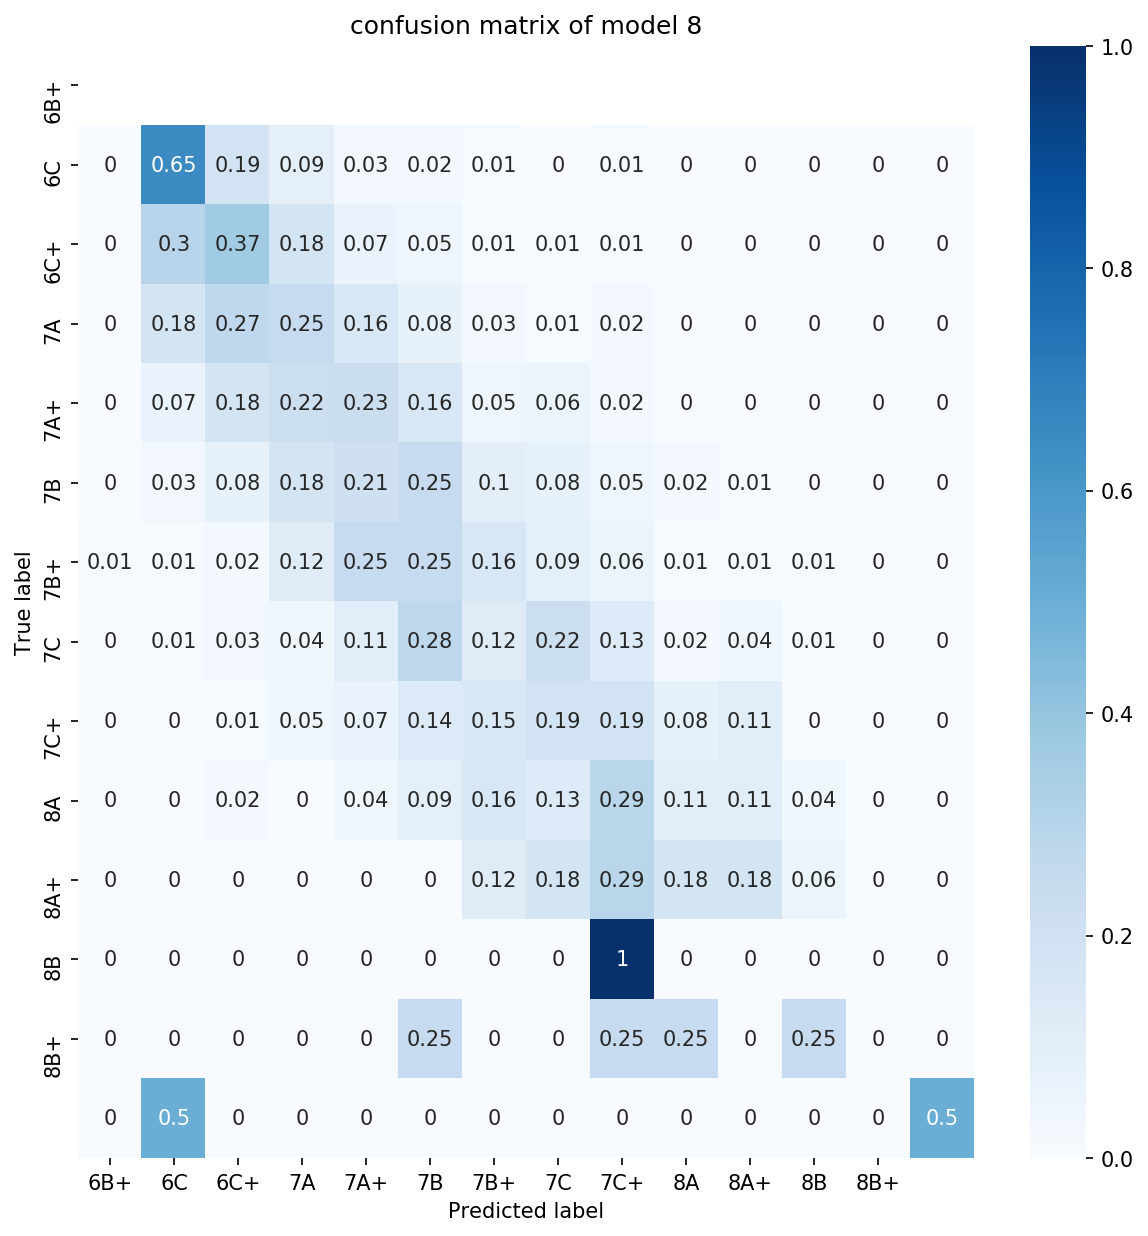

In [249]:
plot_confusion_matrix(Y_dev_n, model8.predict_classes(X_dev_n), title = 'confusion matrix of model 8')

In [359]:
F1_8 = metrics.f1_score(Y_dev_n, model8.predict_classes(X_dev_n), average = 'macro')
print(F1_8)

0.23127592036577824


### Model 9: Deep RNN

In [87]:
model9 = Sequential()
model9.add(Masking(mask_value=0., input_shape=(30, 10)))
model9.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model9.add(Dense(50))
model9.add(Dense(32))
model9.add(Dense(16, activation='softmax'))
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model9.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_13 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
Total params: 51,610
Trainable params: 51,610
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
history9_all = []

In [89]:
for i in range(5):
    history9 = model9.fit(X_train_n, Y_train_n, epochs=10, batch_size=256, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
    history9_all.append(history9)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 10s 421us/step - loss: 4.0150 - accuracy: 0.3189 - val_loss: 1.7347 - val_accuracy: 0.3570
Epoch 2/10
24634/24634 [==============================] - 10s 386us/step - loss: 3.5680 - accuracy: 0.3648 - val_loss: 1.6705 - val_accuracy: 0.3630
Epoch 3/10
24634/24634 [==============================] - 9s 382us/step - loss: 3.4294 - accuracy: 0.3789 - val_loss: 1.5936 - val_accuracy: 0.3890
Epoch 4/10
24634/24634 [==============================] - 9s 382us/step - loss: 3.3583 - accuracy: 0.3859 - val_loss: 1.5857 - val_accuracy: 0.3867
Epoch 5/10
24634/24634 [==============================] - 9s 382us/step - loss: 3.3223 - accuracy: 0.3866 - val_loss: 1.5380 - val_accuracy: 0.4050
Epoch 6/10
24634/24634 [==============================] - 10s 424us/step - loss: 3.2766 - accuracy: 0.3928 - val_loss: 1.5729 - val_accuracy: 0.3833
Epoch 7/10
24634/24634 [==============================] - 10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


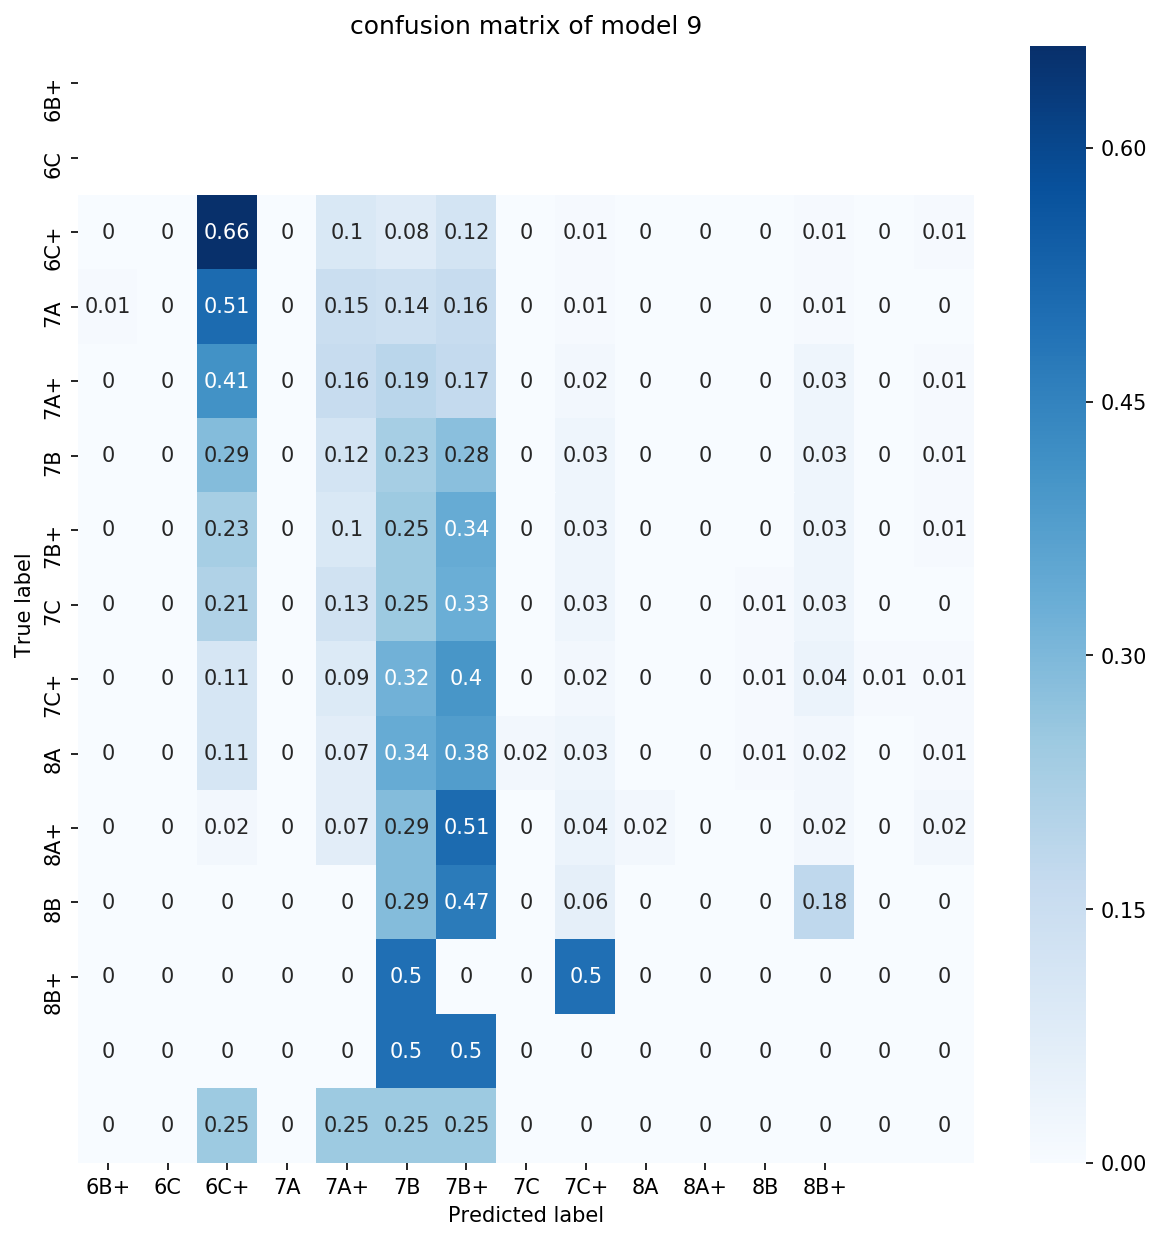

In [248]:
plot_confusion_matrix(Y_dev_n, model9.predict_classes(X_dev_n), title = 'confusion matrix of model 9')

In [358]:
F1_9 = metrics.f1_score(Y_dev_n, model9.predict_classes(X_dev_n), average = 'macro')
print(F1_9)

0.08005644915190242


### Model 10: Deep RNN

In [155]:
model10 = Sequential()
model10.add(Masking(mask_value=0., input_shape=(30, 10)))
model10.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model10.add(Dense(100))
model10.add(Dense(100))
model10.add(Dense(50))
model10.add(Dense(16, activation='softmax'))
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model10.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_26 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_64 (Dense)             (None, 16)                816       
Total params: 70,466
Trainable params: 70,466
Non-trainable params: 0
_________________________________________________

In [156]:
history10_all = []

In [157]:
for i in range(100):
    history10 = model10.fit(X_train_n, Y_train_n, epochs=10, batch_size=32, validation_data = (X_dev_n, Y_dev_n), class_weight=class_weight_log)
    history10_all.append(history10)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 23s 949us/step - loss: 3.5523 - accuracy: 0.3548 - val_loss: 1.6137 - val_accuracy: 0.3897
Epoch 2/10
24634/24634 [==============================] - 23s 947us/step - loss: 3.3429 - accuracy: 0.3824 - val_loss: 1.5718 - val_accuracy: 0.3647
Epoch 3/10
24634/24634 [==============================] - 20s 821us/step - loss: 3.2936 - accuracy: 0.3888 - val_loss: 1.5642 - val_accuracy: 0.3830
Epoch 4/10
24634/24634 [==============================] - 23s 924us/step - loss: 3.2565 - accuracy: 0.3904 - val_loss: 1.5872 - val_accuracy: 0.3770
Epoch 5/10
24634/24634 [==============================] - 20s 829us/step - loss: 3.2192 - accuracy: 0.3953 - val_loss: 1.5192 - val_accuracy: 0.3963
Epoch 6/10
24634/24634 [==============================] - 21s 856us/step - loss: 3.1931 - accuracy: 0.3916 - val_loss: 1.5956 - val_accuracy: 0.3677
Epoch 7/10
24634/24634 [==============================] -

KeyboardInterrupt: 

In [357]:
F1_10 = metrics.f1_score(Y_dev_n, model10.predict_classes(X_dev_n), average = 'macro')
print(F1_10)

0.19429222985938466


### model 11: deep RNN, not using weighted sample

In [102]:
model11 = Sequential()
model11.add(Masking(mask_value=0., input_shape=(30, 10)))
model11.add(LSTM(100, activation='relu', input_shape=(30, 10)))
model11.add(Dense(100))
model11.add(Dense(100))
model11.add(Dense(50))
model11.add(Dense(16, activation='softmax'))
model11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model11.summary())

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_17 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_37 (Dense)             (None, 16)                816       
Total params: 70,466
Trainable params: 70,466
Non-trainable params: 0
_________________________________________________

In [103]:
history11_all = []

In [104]:
for i in range(10):
    history11 = model11.fit(X_train_n, Y_train_n, epochs=10, batch_size=32, validation_data = (X_dev_n, Y_dev_n))
    history11_all.append(history11)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 22s 879us/step - loss: 1.6528 - sparse_categorical_accuracy: 0.3787 - val_loss: 1.5721 - val_sparse_categorical_accuracy: 0.3990
Epoch 2/10
24634/24634 [==============================] - 24s 994us/step - loss: 1.5526 - sparse_categorical_accuracy: 0.3997 - val_loss: 1.5372 - val_sparse_categorical_accuracy: 0.4033
Epoch 3/10
24634/24634 [==============================] - 22s 874us/step - loss: 1.5312 - sparse_categorical_accuracy: 0.4056 - val_loss: 1.5455 - val_sparse_categorical_accuracy: 0.4030
Epoch 4/10
24634/24634 [==============================] - 21s 868us/step - loss: 1.5175 - sparse_categorical_accuracy: 0.4103 - val_loss: 1.5048 - val_sparse_categorical_accuracy: 0.4130
Epoch 5/10
24634/24634 [==============================] - 21s 832us/step - loss: 1.5056 - sparse_categorical_accuracy: 0.4113 - val_loss: 1.5216 - val_sparse_categorical_accuracy: 0.4057
Epoch 6/10
24634

In [227]:
Y_pred = model11.predict_classes(X_dev_n)

In [356]:
F1_11 = metrics.f1_score(Y_dev_n, model11.predict_classes(X_dev_n), average = 'macro')
print(F1_11)

0.18060846300886588


### model 12: deep RNN, specifying activation function and initialization

In [105]:
model12 = Sequential()
model12.add(Masking(mask_value=0., input_shape=(30, 10)))
model12.add(LSTM(100, activation='relu', input_shape=(30, 10), kernel_initializer='glorot_normal'))
model12.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model12.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model12.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
model12.add(Dense(16, activation='softmax'))
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model12.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_18 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_41 (Dense)             (None, 16)                816       
Total params: 70,466
Trainable params: 70,466
Non-trainable params: 0
_________________________________________________

In [106]:
history12_all = []

In [107]:
for i in range(10):
    history12 = model12.fit(X_train_n, Y_train_n, epochs=10, batch_size=32, validation_data = (X_dev_n, Y_dev_n))
    history12_all.append(history12)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 24s 968us/step - loss: 1.6923 - sparse_categorical_accuracy: 0.3730 - val_loss: 1.5856 - val_sparse_categorical_accuracy: 0.3957
Epoch 2/10
24634/24634 [==============================] - 23s 925us/step - loss: 1.5617 - sparse_categorical_accuracy: 0.3977 - val_loss: 1.5465 - val_sparse_categorical_accuracy: 0.4087
Epoch 3/10
24634/24634 [==============================] - 24s 961us/step - loss: 1.5339 - sparse_categorical_accuracy: 0.4026 - val_loss: 1.5168 - val_sparse_categorical_accuracy: 0.4067
Epoch 4/10
24634/24634 [==============================] - 20s 822us/step - loss: 1.5140 - sparse_categorical_accuracy: 0.4103 - val_loss: 1.5236 - val_sparse_categorical_accuracy: 0.4050
Epoch 5/10
24634/24634 [==============================] - 32s 1ms/step - loss: 1.4976 - sparse_categorical_accuracy: 0.4151 - val_loss: 1.5040 - val_sparse_categorical_accuracy: 0.4080
Epoch 6/10
24634/2

In [355]:
F1_12 = metrics.f1_score(Y_dev_n, model12.predict_classes(X_dev_n), average = 'macro')
print(F1_12)

0.19593284950279313


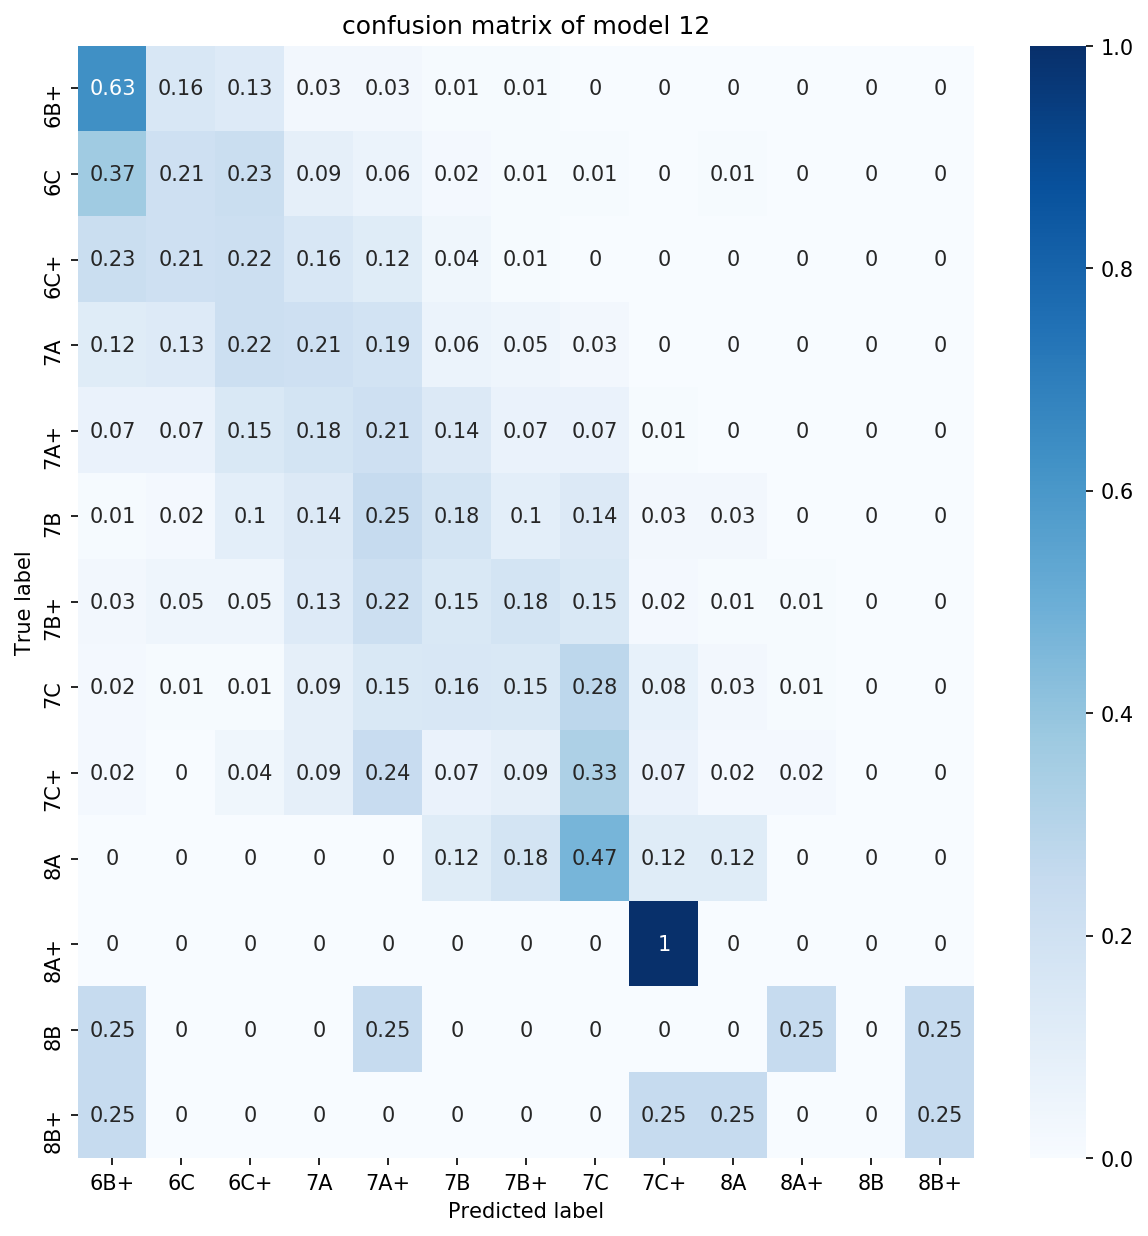

In [224]:
plot_confusion_matrix(Y_dev_n, model12.predict_classes(X_dev_n), title = 'confusion matrix of model 12')

### model 13: try CNN

In [108]:
training_cnn_set_path = parent_wd + '/preprocessing/training_set_cnn'
dev_cnn_set_path = parent_wd + '/preprocessing/dev_set_cnn'

In [109]:
with open(training_cnn_set_path, 'rb') as f:
    training_set_cnn = pickle.load(f)
with open(dev_cnn_set_path, 'rb') as f:
    dev_set_cnn = pickle.load(f)

In [113]:
X_train_cnn = training_set_cnn['X']
Y_train_cnn = training_set_cnn['Y']
X_dev_cnn = dev_set_cnn['X']
Y_dev_cnn = dev_set_cnn['Y']

In [110]:
from keras.layers import Dense, Conv2D, Flatten

In [111]:
model13 = Sequential()
model13.add(Conv2D(64, kernel_size=8, activation='relu', input_shape=(11, 18, 9), kernel_initializer='glorot_normal'))
model13.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='glorot_normal'))
model13.add(Flatten())
model13.add(Dense(16, activation='softmax', kernel_initializer='he_normal'))
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model13.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 11, 64)         36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 9, 32)          18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                9232      
Total params: 64,624
Trainable params: 64,624
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
history13_all = []

In [114]:
for i in range(10):
    history13 = model13.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_data = (X_dev_cnn, Y_dev_cnn))
    history13_all.append(history13)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 6s 250us/step - loss: 1.7317 - sparse_categorical_accuracy: 0.3593 - val_loss: 1.6198 - val_sparse_categorical_accuracy: 0.3847
Epoch 2/10
24634/24634 [==============================] - 7s 264us/step - loss: 1.5949 - sparse_categorical_accuracy: 0.3869 - val_loss: 1.5700 - val_sparse_categorical_accuracy: 0.3937
Epoch 3/10
24634/24634 [==============================] - 7s 283us/step - loss: 1.5620 - sparse_categorical_accuracy: 0.3976 - val_loss: 1.5246 - val_sparse_categorical_accuracy: 0.4130
Epoch 4/10
24634/24634 [==============================] - 8s 313us/step - loss: 1.5378 - sparse_categorical_accuracy: 0.4045 - val_loss: 1.5240 - val_sparse_categorical_accuracy: 0.4120
Epoch 5/10
24634/24634 [==============================] - 5s 198us/step - loss: 1.5202 - sparse_categorical_accuracy: 0.4065 - val_loss: 1.5099 - val_sparse_categorical_accuracy: 0.4113
Epoch 6/10
24634/2463

In [115]:
for i in range(10):
    history13 = model13.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_data = (X_dev_cnn, Y_dev_cnn))
    history13_all.append(history13)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 6s 239us/step - loss: 0.8493 - sparse_categorical_accuracy: 0.6693 - val_loss: 2.5985 - val_sparse_categorical_accuracy: 0.3720
Epoch 2/10
24634/24634 [==============================] - 5s 205us/step - loss: 0.8384 - sparse_categorical_accuracy: 0.6751 - val_loss: 2.6133 - val_sparse_categorical_accuracy: 0.3657
Epoch 3/10
24634/24634 [==============================] - 5s 212us/step - loss: 0.8415 - sparse_categorical_accuracy: 0.6736 - val_loss: 2.5684 - val_sparse_categorical_accuracy: 0.3793
Epoch 4/10
24634/24634 [==============================] - 5s 209us/step - loss: 0.8350 - sparse_categorical_accuracy: 0.6763 - val_loss: 2.6087 - val_sparse_categorical_accuracy: 0.3653
Epoch 5/10
24634/24634 [==============================] - 5s 197us/step - loss: 0.8294 - sparse_categorical_accuracy: 0.6774 - val_loss: 2.5735 - val_sparse_categorical_accuracy: 0.3697
Epoch 6/10
24634/2463

In [116]:
for i in range(10):
    history13 = model13.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_data = (X_dev_cnn, Y_dev_cnn))
    history13_all.append(history13)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 6s 254us/step - loss: 0.6526 - sparse_categorical_accuracy: 0.7458 - val_loss: 3.8604 - val_sparse_categorical_accuracy: 0.3460
Epoch 2/10
24634/24634 [==============================] - 6s 241us/step - loss: 0.6405 - sparse_categorical_accuracy: 0.7510 - val_loss: 3.9844 - val_sparse_categorical_accuracy: 0.3620
Epoch 3/10
24634/24634 [==============================] - 6s 244us/step - loss: 0.6429 - sparse_categorical_accuracy: 0.7508 - val_loss: 3.8931 - val_sparse_categorical_accuracy: 0.3573
Epoch 4/10
24634/24634 [==============================] - 5s 214us/step - loss: 0.6501 - sparse_categorical_accuracy: 0.7488 - val_loss: 3.8619 - val_sparse_categorical_accuracy: 0.3510
Epoch 5/10
24634/24634 [==============================] - 6s 235us/step - loss: 0.6430 - sparse_categorical_accuracy: 0.7498 - val_loss: 3.8486 - val_sparse_categorical_accuracy: 0.3563
Epoch 6/10
24634/2463

In [117]:
for i in range(10):
    history13 = model13.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_data = (X_dev_cnn, Y_dev_cnn))
    history13_all.append(history13)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 7s 269us/step - loss: 0.5635 - sparse_categorical_accuracy: 0.7835 - val_loss: 4.9909 - val_sparse_categorical_accuracy: 0.3700
Epoch 2/10
24634/24634 [==============================] - 8s 319us/step - loss: 0.5696 - sparse_categorical_accuracy: 0.7810 - val_loss: 4.7726 - val_sparse_categorical_accuracy: 0.3687
Epoch 3/10
24634/24634 [==============================] - 6s 244us/step - loss: 0.5607 - sparse_categorical_accuracy: 0.7861 - val_loss: 4.8519 - val_sparse_categorical_accuracy: 0.3567
Epoch 4/10
24634/24634 [==============================] - 5s 208us/step - loss: 0.5626 - sparse_categorical_accuracy: 0.7818 - val_loss: 5.1971 - val_sparse_categorical_accuracy: 0.3527
Epoch 5/10
24634/24634 [==============================] - 5s 186us/step - loss: 0.5586 - sparse_categorical_accuracy: 0.7835 - val_loss: 5.0055 - val_sparse_categorical_accuracy: 0.3567
Epoch 6/10
24634/2463

In [354]:
F1_13 = metrics.f1_score(Y_dev_cnn, model13.predict_classes(X_dev_cnn), average = 'macro')
print(F1_13)

0.20380318898893396


### model 14: deeper CNN

In [118]:
model14 = Sequential()
model14.add(Conv2D(64, kernel_size=8, padding = 'same', activation='relu', input_shape=(11, 18, 9), kernel_initializer='glorot_normal'))
model14.add(Conv2D(64, kernel_size=5, padding = 'same', activation='relu', kernel_initializer='glorot_normal'))
model14.add(Conv2D(32, kernel_size=5, padding = 'same', activation='relu', kernel_initializer='glorot_normal'))
model14.add(Flatten())
model14.add(Dense(32, activation='relu', kernel_initializer='glorot_normal'))
model14.add(Dense(16, activation='softmax', kernel_initializer='he_normal'))
model14.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model14.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 11, 18, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 18, 64)        102464    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 18, 32)        51232     
_________________________________________________________________
flatten_2 (Flatten)          (None, 6336)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                202784    
_________________________________________________________________
dense_44 (Dense)             (None, 16)                528       
Total params: 393,936
Trainable params: 393,936
Non-trainable params: 0
_______________________________________________

In [119]:
history14_all = []

In [120]:
for i in range(50):
    history14 = model14.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_data = (X_dev_cnn, Y_dev_cnn))
    history14_all.append(history14)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 67s 3ms/step - loss: 1.7109 - sparse_categorical_accuracy: 0.3693 - val_loss: 1.6609 - val_sparse_categorical_accuracy: 0.3633
Epoch 2/10
24634/24634 [==============================] - 71s 3ms/step - loss: 1.5495 - sparse_categorical_accuracy: 0.3997 - val_loss: 1.4953 - val_sparse_categorical_accuracy: 0.4220
Epoch 3/10
24634/24634 [==============================] - 73s 3ms/step - loss: 1.5088 - sparse_categorical_accuracy: 0.4117 - val_loss: 1.5863 - val_sparse_categorical_accuracy: 0.3967
Epoch 4/10
24634/24634 [==============================] - 73s 3ms/step - loss: 1.4802 - sparse_categorical_accuracy: 0.4205 - val_loss: 1.5487 - val_sparse_categorical_accuracy: 0.3860
Epoch 5/10
24634/24634 [==============================] - 69s 3ms/step - loss: 1.4506 - sparse_categorical_accuracy: 0.4268 - val_loss: 1.5200 - val_sparse_categorical_accuracy: 0.3957
Epoch 6/10
24634/24634 [==

KeyboardInterrupt: 

In [353]:
F1_14 = metrics.f1_score(Y_dev_cnn, model14.predict_classes(X_dev_cnn), average = 'macro')
print(F1_14)

0.20873122169304875


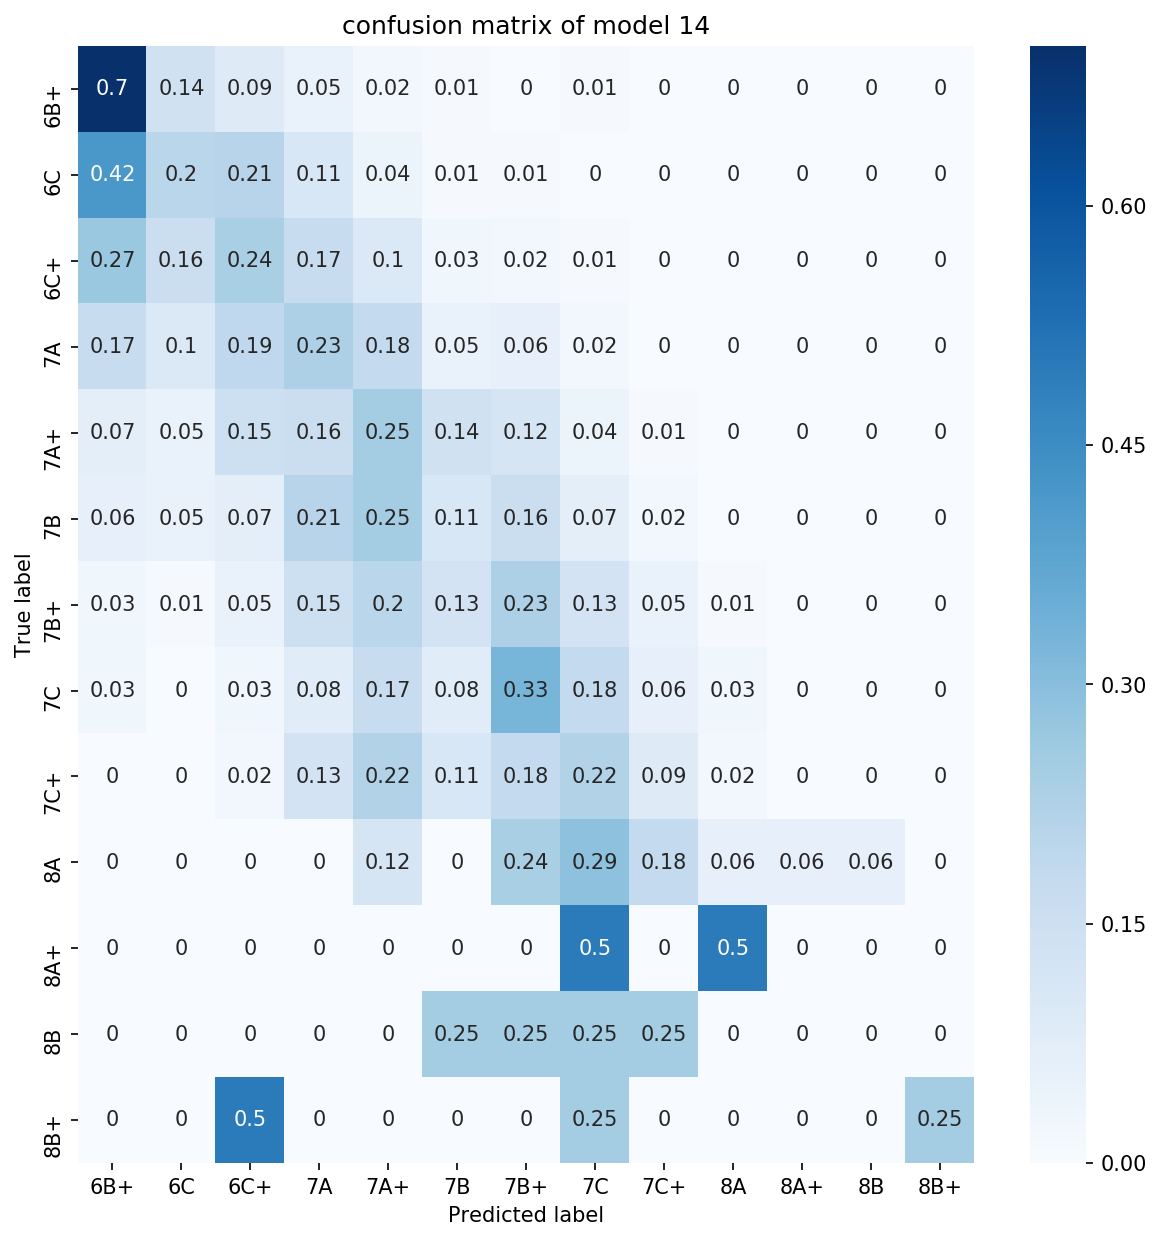

In [223]:
plot_confusion_matrix(Y_dev_cnn, model14.predict_classes(X_dev_cnn), title = 'confusion matrix of model 14')

### model 15 RNN + dropout

In [367]:
model15 = Sequential()
model15.add(Masking(mask_value=0., input_shape=(30, 10)))
model15.add(LSTM(100, activation='relu', input_shape=(30, 10), kernel_initializer='glorot_normal'))
model15.add(Dropout(0.2))
model15.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model15.add(Dropout(0.2))
model15.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model15.add(Dropout(0.2))
model15.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
model15.add(Dropout(0.2))
model15.add(Dense(16, activation='softmax'))
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model15.summary())

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_27 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)             

In [368]:
history15_all = []

In [ ]:
for i in range(100):
    history15 = model15.fit(X_train_n, Y_train_n, epochs=10, batch_size=32, validation_data = (X_dev_n, Y_dev_n))
    history15_all.append(history15)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 27s 1ms/step - loss: 1.7779 - sparse_categorical_accuracy: 0.3507 - val_loss: 1.6062 - val_sparse_categorical_accuracy: 0.3917
Epoch 2/10
24634/24634 [==============================] - 24s 960us/step - loss: 1.6151 - sparse_categorical_accuracy: 0.3889 - val_loss: 1.5667 - val_sparse_categorical_accuracy: 0.4043
Epoch 3/10
24634/24634 [==============================] - 22s 883us/step - loss: 1.5750 - sparse_categorical_accuracy: 0.3968 - val_loss: 1.5381 - val_sparse_categorical_accuracy: 0.4110
Epoch 4/10
24634/24634 [==============================] - 20s 817us/step - loss: 1.5531 - sparse_categorical_accuracy: 0.4018 - val_loss: 1.5124 - val_sparse_categorical_accuracy: 0.4190
Epoch 5/10
24634/24634 [==============================] - 22s 902us/step - loss: 1.5343 - sparse_categorical_accuracy: 0.4097 - val_loss: 1.4946 - val_sparse_categorical_accuracy: 0.4197
Epoch 6/10
24634/2

In [370]:
len(history15_all)

14

In [371]:
F1_15 = metrics.f1_score(Y_dev_n, model15.predict_classes(X_dev_n), average = 'macro')
print(F1_15)

0.20116857603386903


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


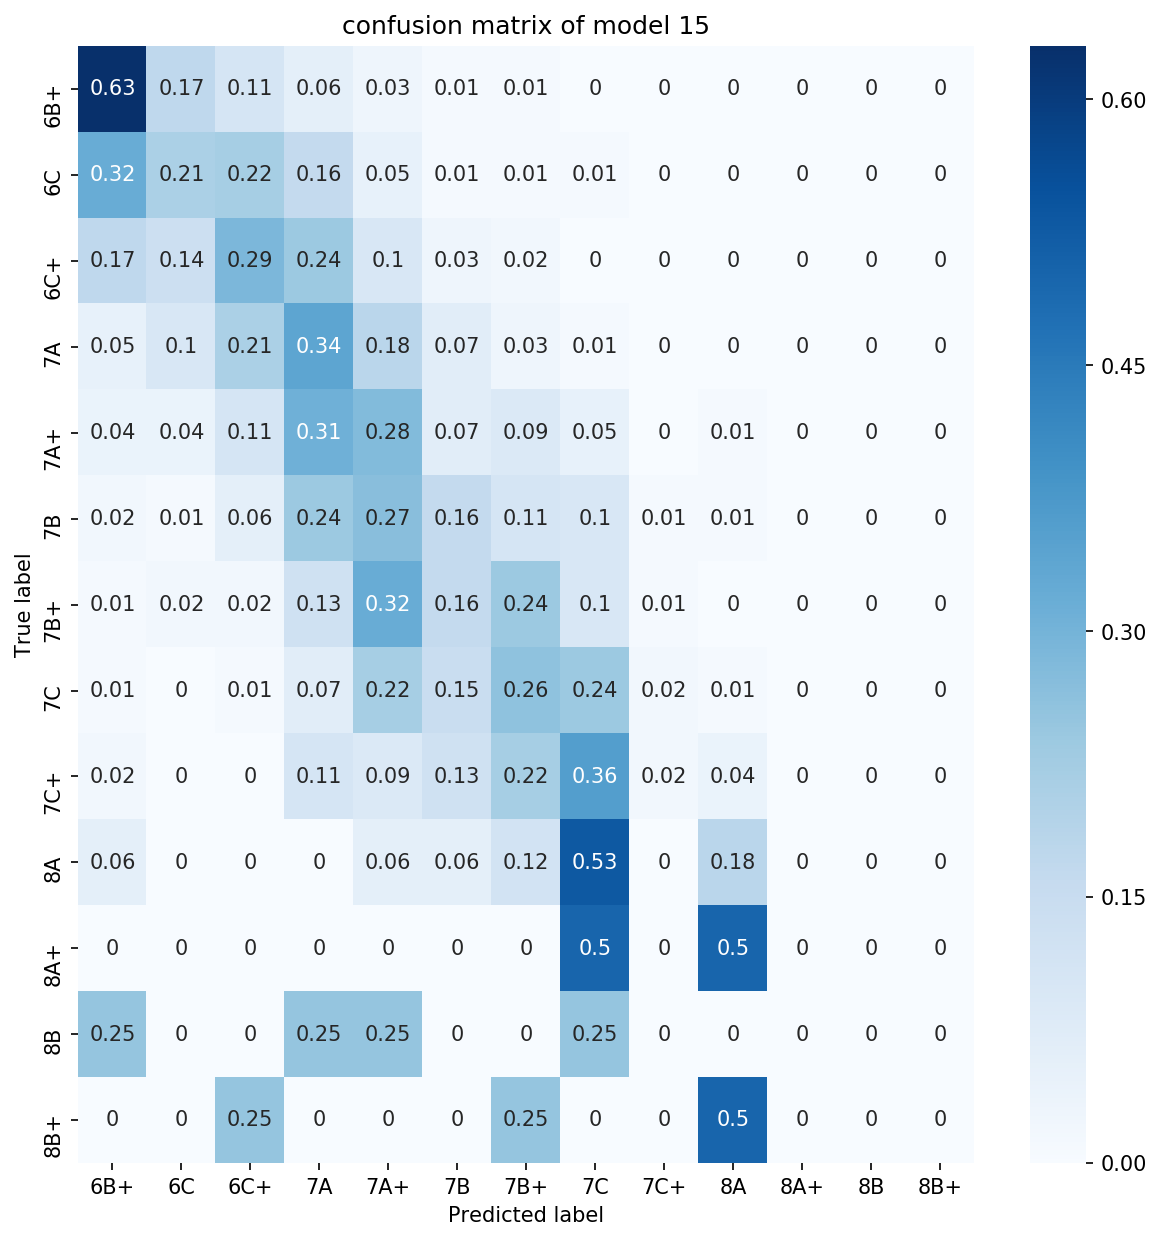

In [372]:
plot_confusion_matrix(Y_dev_n, model15.predict_classes(X_dev_n), title = 'confusion matrix of model 15')

### model 16 RNN + L2 regularization

In [ ]:
output_xy_mode['l']

In [129]:
from keras import regularizers

In [131]:
model16 = Sequential()
model16.add(Masking(mask_value=0., input_shape=(30, 10)))
model16.add(LSTM(100, activation='relu', input_shape=(30, 10), kernel_initializer='glorot_normal', return_sequences = 'True'))
model16.add(LSTM(100, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
model16.add(Dense(100, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
model16.add(Dense(100, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
model16.add(Dense(50, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
model16.add(Dense(16, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model16.summary())

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_25 (Masking)         (None, 30, 10)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 30, 100)           44400     
_________________________________________________________________
lstm_40 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_57 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_60 (Dense)             (None, 16)              

In [132]:
history16_all = []
np.random.seed(0)

In [133]:
for i in range(100):
    history16 = model16.fit(X_train_n, Y_train_n, epochs=10, batch_size=32, validation_data = (X_dev_n, Y_dev_n))
    history16_all.append(history16)

Train on 24634 samples, validate on 3000 samples
Epoch 1/10
24634/24634 [==============================] - 43s 2ms/step - loss: 2.2666 - sparse_categorical_accuracy: 0.3416 - val_loss: 1.7954 - val_sparse_categorical_accuracy: 0.3603
Epoch 2/10
24634/24634 [==============================] - 41s 2ms/step - loss: 1.7420 - sparse_categorical_accuracy: 0.3757 - val_loss: 1.6958 - val_sparse_categorical_accuracy: 0.3810
Epoch 3/10
24634/24634 [==============================] - 41s 2ms/step - loss: 1.6776 - sparse_categorical_accuracy: 0.3874 - val_loss: 1.6574 - val_sparse_categorical_accuracy: 0.3917
Epoch 4/10
24634/24634 [==============================] - 42s 2ms/step - loss: 1.6454 - sparse_categorical_accuracy: 0.3922 - val_loss: 1.6180 - val_sparse_categorical_accuracy: 0.3903
Epoch 5/10
24634/24634 [==============================] - 42s 2ms/step - loss: 1.6203 - sparse_categorical_accuracy: 0.3973 - val_loss: 1.6610 - val_sparse_categorical_accuracy: 0.3883
Epoch 6/10
24634/24634 [==

KeyboardInterrupt: 

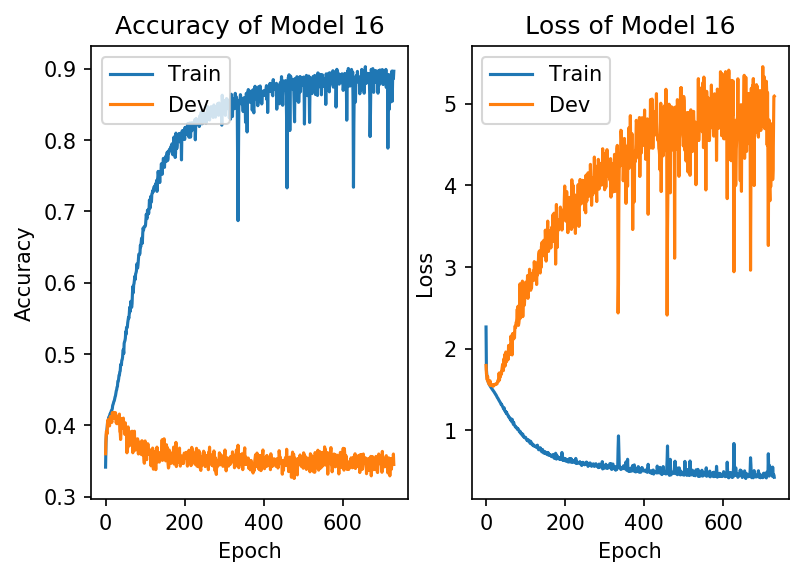

In [336]:
# Plot training & validation accuracy values
history_all = history16_all
acc = []
val_acc = []
loss = []
val_loss = []
for history in history_all:
    acc.append(history.history['sparse_categorical_accuracy'])
    val_acc.append(history.history['val_sparse_categorical_accuracy'])
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

acc = sum(acc, [])
val_acc = sum(val_acc, [])
loss = sum(loss, [])
val_loss = sum(val_loss, [])

fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
axes[0].plot(acc)
axes[0].plot(val_acc)
axes[0].set_title('Accuracy of Model 16')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Dev'], loc='upper left')

axes[1].plot(loss)
axes[1].plot(val_loss)
axes[1].set_title('Loss of Model 16')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Dev'], loc='upper left')

In [166]:
from sklearn import metrics

In [350]:
F1_16 = metrics.f1_score(Y_dev_n, model16.predict_classes(X_dev_n), average = 'macro')
print(F1_16)

0.16486052596574513


In [349]:
F1_16

0.16486052596574513

In [169]:
import seaborn as sns

In [222]:
def plot_confusion_matrix(Y_true, Y_predict, title = None):
    matrix = metrics.confusion_matrix(Y_true, Y_predict)
    con_mat_norm = np.around(matrix / matrix.sum(axis=1)[:, np.newaxis], decimals=2)
    figure = plt.figure(figsize=(8, 8), dpi = 150)
    sns.heatmap(con_mat_norm, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(13)+0.5,['6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
    plt.yticks(np.arange(13)+0.5,['6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
    plt.title(title)
    plt.show()
    return

In [245]:
matrix = metrics.confusion_matrix(Y_dev_n, model16.predict_classes(X_dev_n))

In [241]:
matrix = tf.math.confusion_matrix(Y_dev_n, model16.predict_classes(X_dev_n)).numpy()

In [246]:
con_mat_norm = np.around(matrix / matrix.sum(axis=1)[:, np.newaxis], decimals=2)

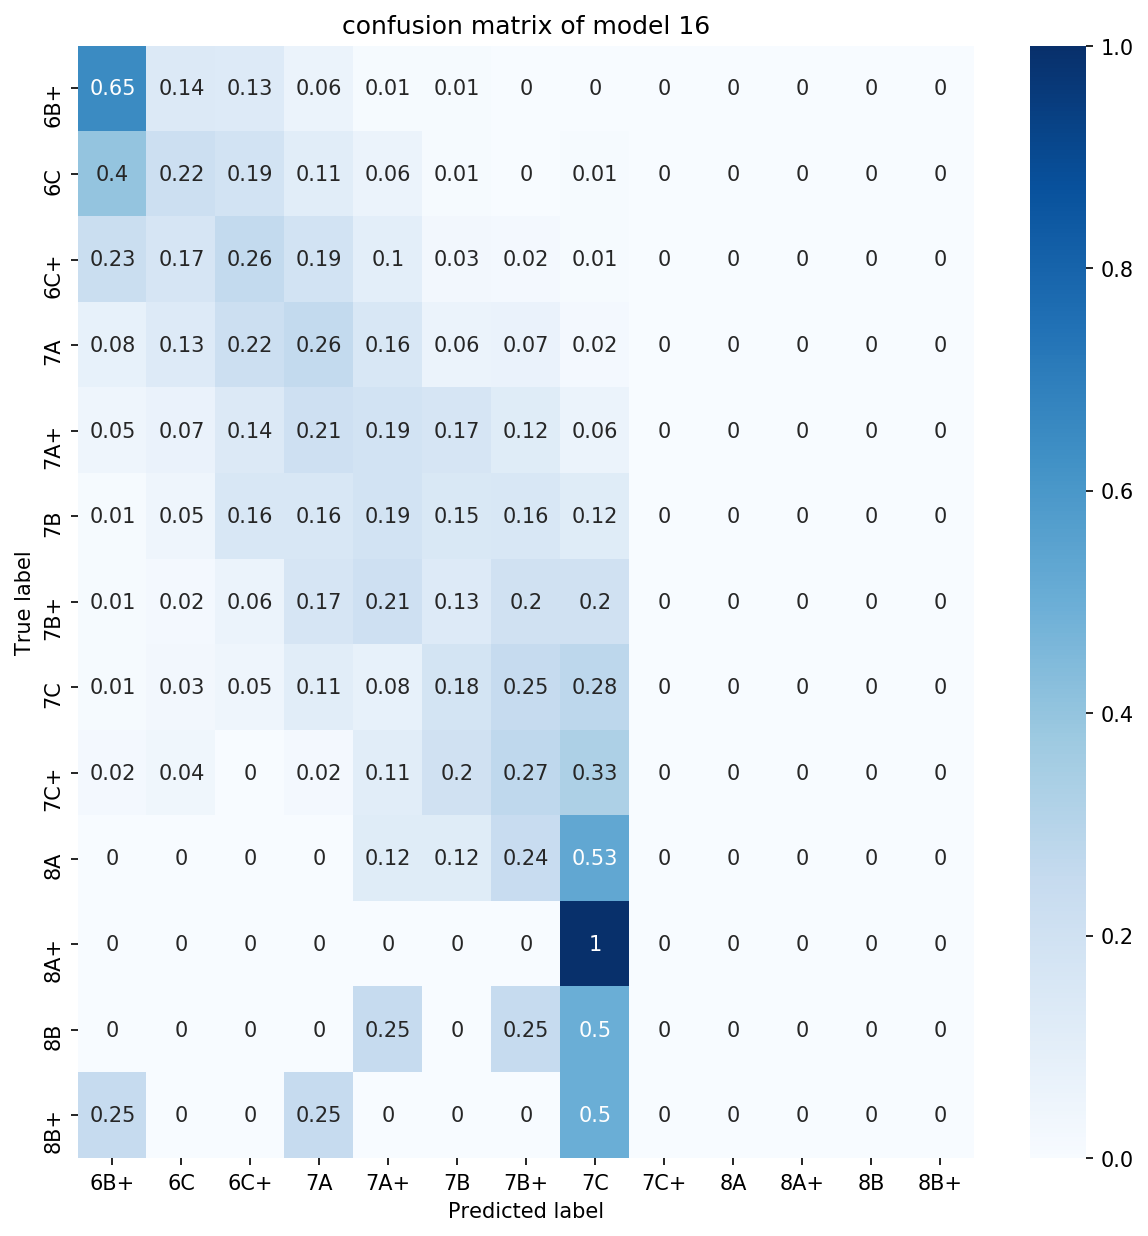

In [247]:
figure = plt.figure(figsize=(8, 8), dpi = 150)
sns.heatmap(con_mat_norm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(13)+0.5,['6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
plt.yticks(np.arange(13)+0.5,['6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
plt.title('confusion matrix of model 16')
plt.show()

In [337]:
np.where(model16.predict_classes(X_dev_n)[np.where(Y_dev_cnn == 11)] == 7)

(array([ 3, 18, 23, 26, 37]),)

In [338]:
dev_set_n['keys'][np.where(Y_dev_cnn == 11)][np.where(model16.predict_classes(X_dev_n)[np.where(Y_dev_cnn == 11)] == 7)]

array(['169258', '311700', '325116', '308121', '302944'], dtype='<U6')

### save model results

In [289]:
model_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
model1.save_weights("model1.h5")

In [290]:
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
model2.save_weights("model2.h5")

In [291]:
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
model3.save_weights("model3.h5")

In [292]:
model_json = model4.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
model4.save_weights("model4.h5")

In [293]:
model_json = model5.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)
model5.save_weights("model5.h5")

In [294]:
model_json = model6.to_json()
with open("model6.json", "w") as json_file:
    json_file.write(model_json)
model6.save_weights("model6.h5")

In [295]:
model_json = model7.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)
model7.save_weights("model7.h5")

In [296]:
model_json = model8.to_json()
with open("model8.json", "w") as json_file:
    json_file.write(model_json)
model8.save_weights("model8.h5")

In [297]:
model_json = model9.to_json()
with open("model9.json", "w") as json_file:
    json_file.write(model_json)
model9.save_weights("model9.h5")

In [298]:
model_json = model10.to_json()
with open("model10.json", "w") as json_file:
    json_file.write(model_json)
model10.save_weights("model10.h5")

In [299]:
model_json = model11.to_json()
with open("model11.json", "w") as json_file:
    json_file.write(model_json)
model11.save_weights("model11.h5")

In [300]:
model_json = model12.to_json()
with open("model12.json", "w") as json_file:
    json_file.write(model_json)
model12.save_weights("model12.h5")

In [301]:
model_json = model13.to_json()
with open("model13.json", "w") as json_file:
    json_file.write(model_json)
model13.save_weights("model13.h5")

In [302]:
model_json = model14.to_json()
with open("model14.json", "w") as json_file:
    json_file.write(model_json)
model14.save_weights("model14.h5")

In [303]:
model_json = model15.to_json()
with open("model15.json", "w") as json_file:
    json_file.write(model_json)
model15.save_weights("model15.h5")

In [304]:
model_json = model16.to_json()
with open("model16.json", "w") as json_file:
    json_file.write(model_json)
model16.save_weights("model16.h5")

In [305]:
history_data = {}
history_data['1'] = history1_all
history_data['2'] = history2_all
history_data['3'] = history3_all
history_data['4'] = history4_all
history_data['5'] = history5_all
history_data['6'] = history6_all
history_data['7'] = history7_all
history_data['8'] = history8_all
history_data['9'] = history9_all
history_data['10'] = history10_all
history_data['11'] = history11_all
history_data['12'] = history12_all
history_data['13'] = history13_all
history_data['14'] = history14_all
history_data['15'] = history15_all
history_data['16'] = history16_all


In [319]:
history_path = parent_wd + '/model/preliminary_training_history'
save_pickle(history_data, history_path)

In [320]:
with open(history_path, 'rb') as f:
    history_read = pickle.load(f)